<font size="+3">Lade bisher beste Modelle für DCGAN & TimeGAN</font>

In [1]:
# Allows imports from modules in the project directory
import os
import sys
import numpy as np
from pathlib import Path
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

PROJECT_DIRECTORY = Path(os.path.abspath('')).resolve().parents[1]
sys.path.extend([str(PROJECT_DIRECTORY)])

DATA_DIRECTORY = Path(os.path.abspath('')).resolve().parents[3]
sys.path.extend([str(DATA_DIRECTORY)])

print(f'Python {sys.version} on {sys.platform}')

Python 3.9.19 (main, Jul  7 2024, 08:52:44) 
[Clang 15.0.0 (clang-1500.3.9.4)] on darwin


In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf

In [36]:
def plot_synthetic(generated_data, plot_sample=8):
    fig, axs = plt.subplots(1, 1, figsize=(25, 8))
    sample_points = np.arange(generated_data.shape[1])
    
    axs.plot(sample_points, generated_data[plot_sample][:], 'r--', label='Synth. Sample')
    
    axs.set_ylabel(r"$amplitude_1$", fontsize=30)
    axs.set_xlabel(f"Time sample (sequence length {len(sample_points)})", fontsize=25)
    
    plt.xticks(fontsize = 25)
    plt.yticks(fontsize = 25)
    axs.legend(fontsize="20")
    
    fig.suptitle("Synthetic sample of $feature_1$ of label $class_0$", fontsize=30)

In [ ]:
# Load best DCGAN model
DCGAN = tf.keras.models.load_model(PROJECT_DIRECTORY / 'GenerativeModel/GAN/models/dcgan/Generator/model.h5')

In [15]:
DCGAN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4096)              524288    
                                                                 
 batch_normalization (BatchN  (None, 4096)             16384     
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 4096)              0         
                                                                 
 reshape (Reshape)           (None, 32, 128)           0         
                                                                 
 conv1d_transpose (Conv1DTra  (None, 32, 256)          163840    
 nspose)                                                         
                                                                 
 batch_normalization_1 (Batc  (None, 32, 256)          1

## Erzeuge eigene synthetische Daten

In [16]:
# Create Samples
SAMPLES = 100

noise = tf.random.normal([SAMPLES,128])
synthetic_samples_DCGAN = DCGAN(noise, training=False)

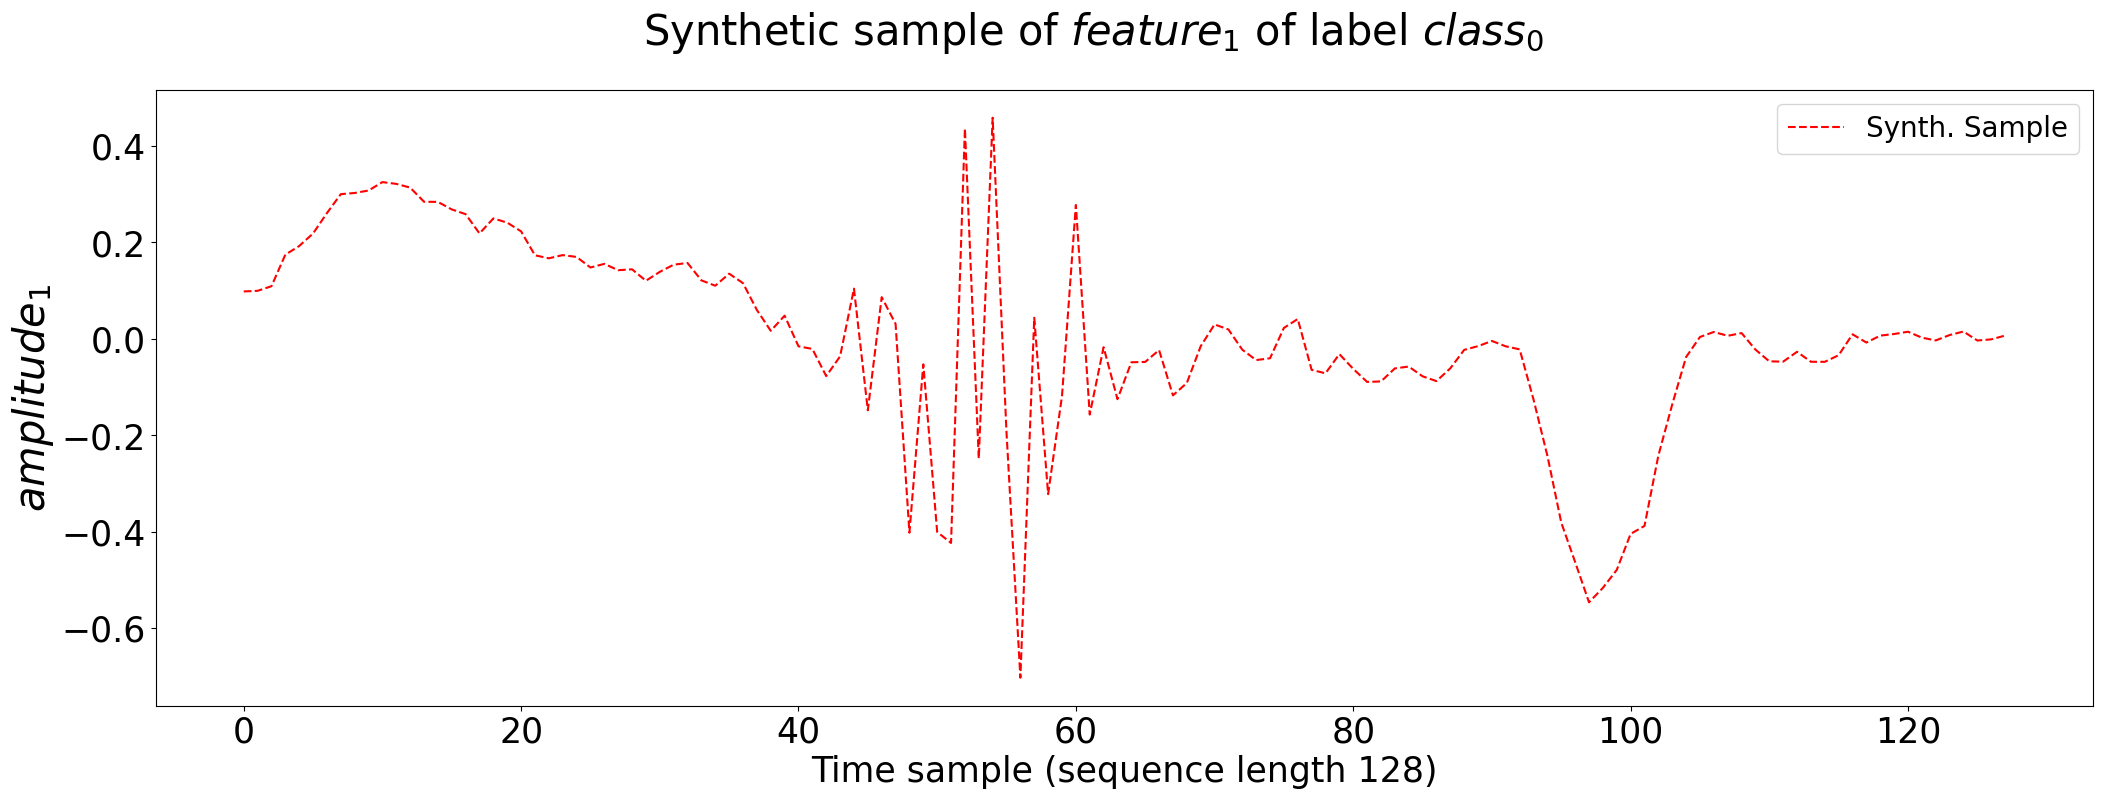

In [40]:
plot_synthetic(synthetic_samples_DCGAN, 4)

In [ ]:
# Load best TimeGAN model
TimeGAN = tf.keras.models.load_model(PROJECT_DIRECTORY / 'GenerativeModel/GAN/models/timegan/TimeGAN/model.h5')

In [20]:
TimeGAN.summary()

Model: "SyntheticData"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 RandomData (InputLayer)     [(None, 24, 1)]           0         
                                                                 
 Generator (Sequential)      (None, 24, 128)           346240    
                                                                 
 Supervisor (Sequential)     (None, 24, 128)           279680    
                                                                 
 Recovery (Sequential)       (None, 24, 1)             394881    
                                                                 
Total params: 1,020,801
Trainable params: 1,020,801
Non-trainable params: 0
_________________________________________________________________


In [21]:
# Create synthetic data
SAMPLES = 64
SEQ_LEN = 24

noise = tf.random.normal([SAMPLES,SEQ_LEN])
synthetic_samples_TimeGAN = TimeGAN(noise, training=False)

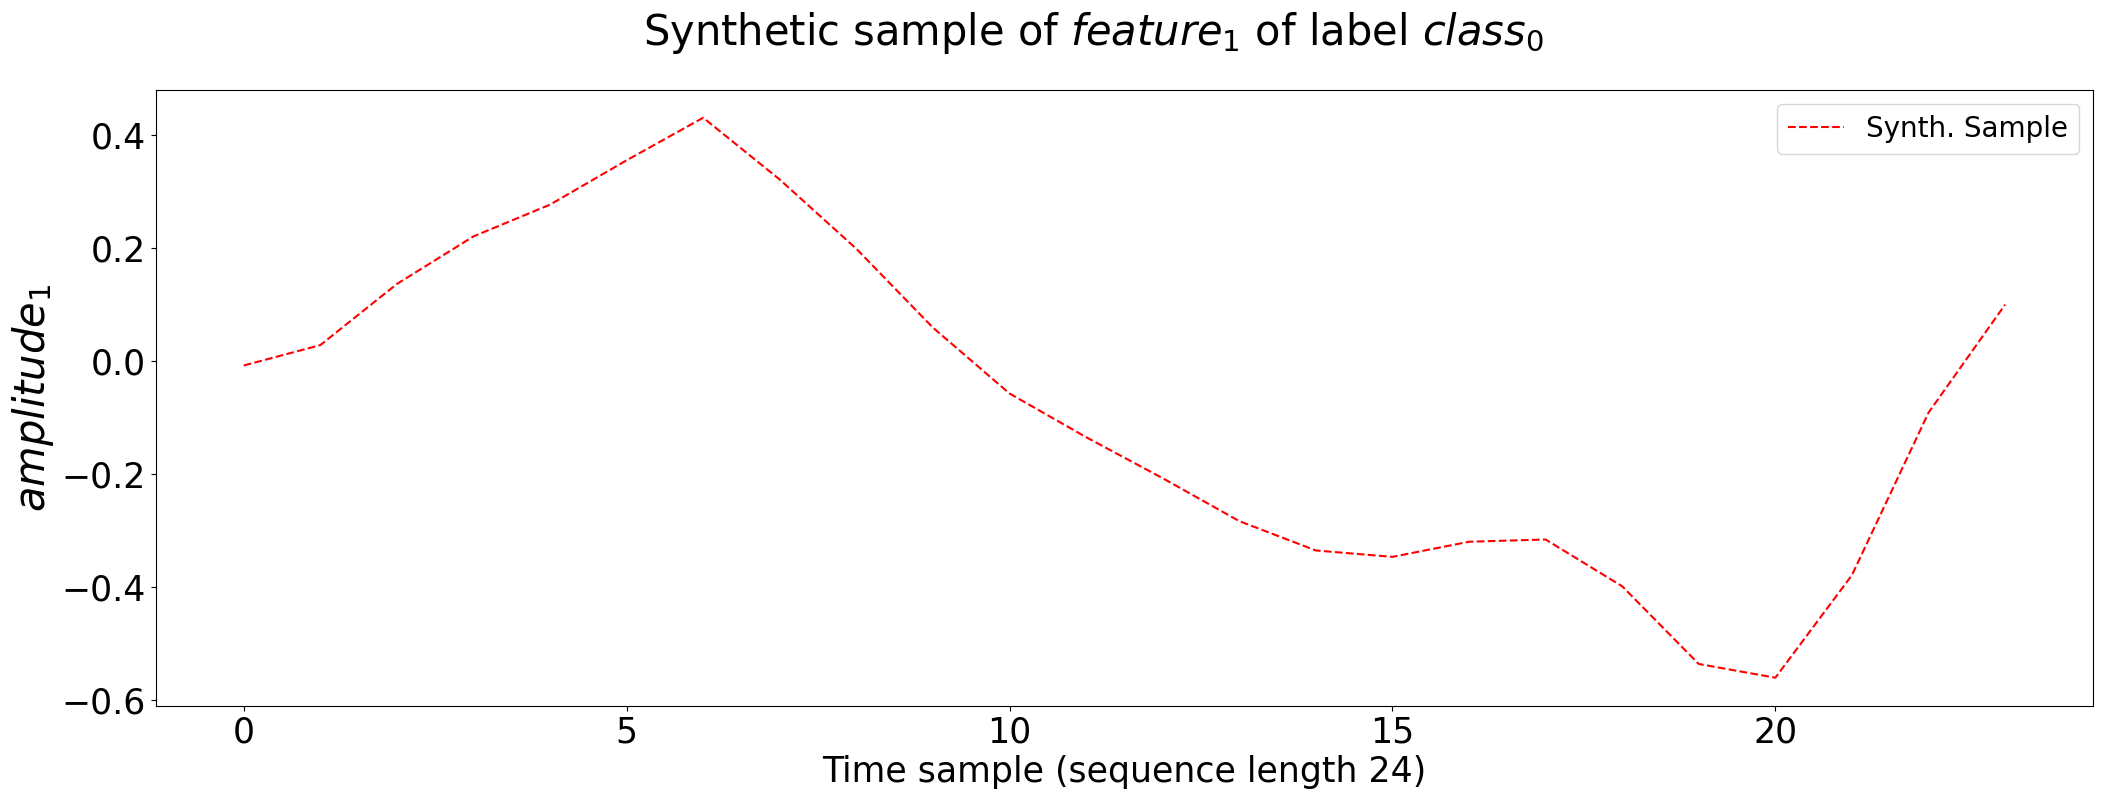

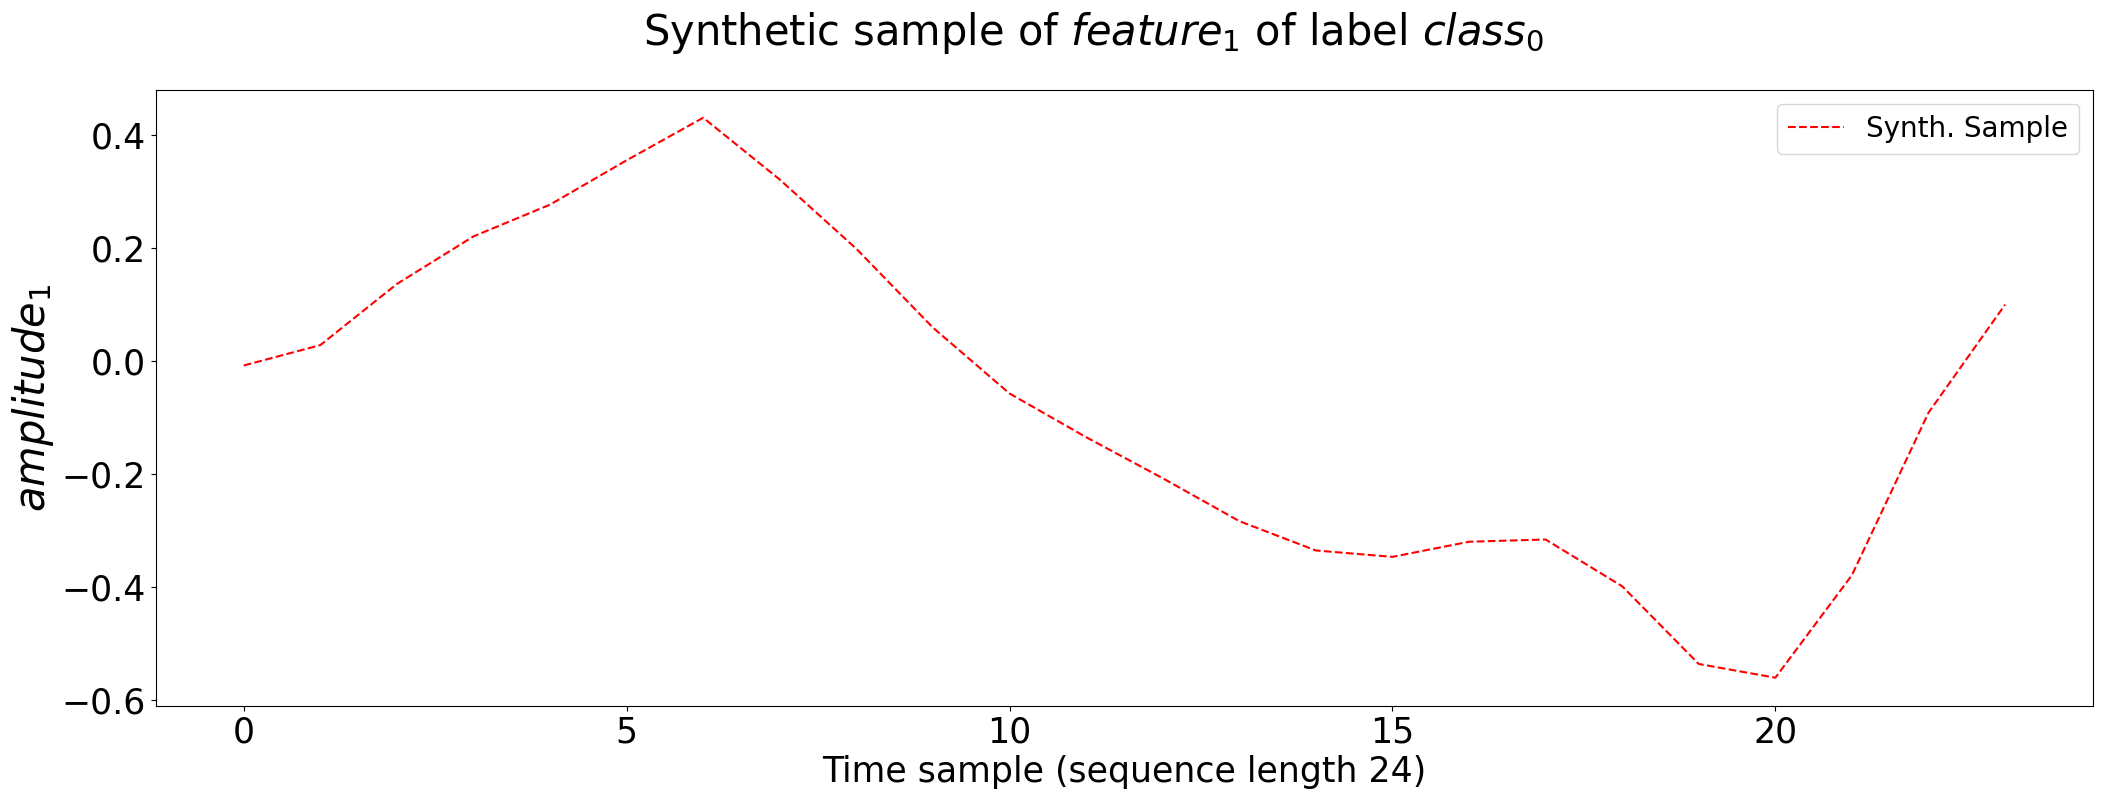

In [37]:
plot_synthetic(synthetic_samples_TimeGAN, 4)

## Load synthetic Data from Tests

In [28]:
generated_data_DCGAN = np.load(PROJECT_DIRECTORY / 'GenerativeModel/GAN/models/dcgan/generated_data.npy')
generated_data_TimeGAN = np.load(PROJECT_DIRECTORY / 'GenerativeModel/GAN/models/timegan/generated_data.npy')

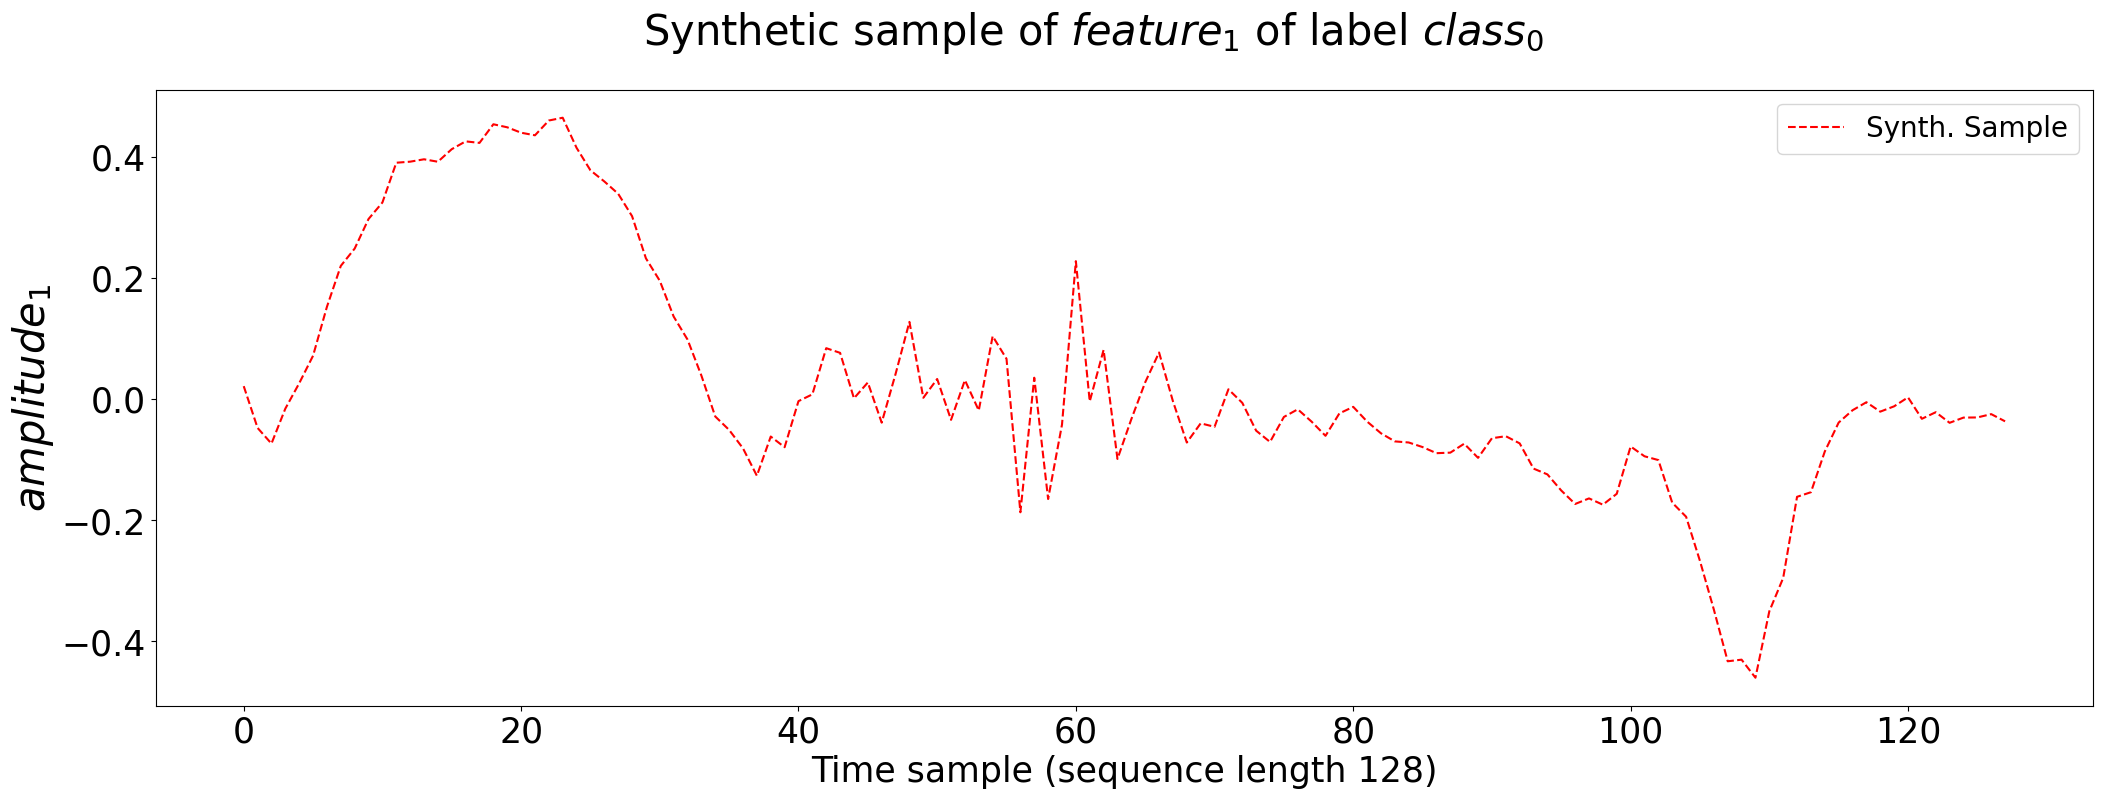

In [35]:
plot_synthetic(generated_data_DCGAN, 1)

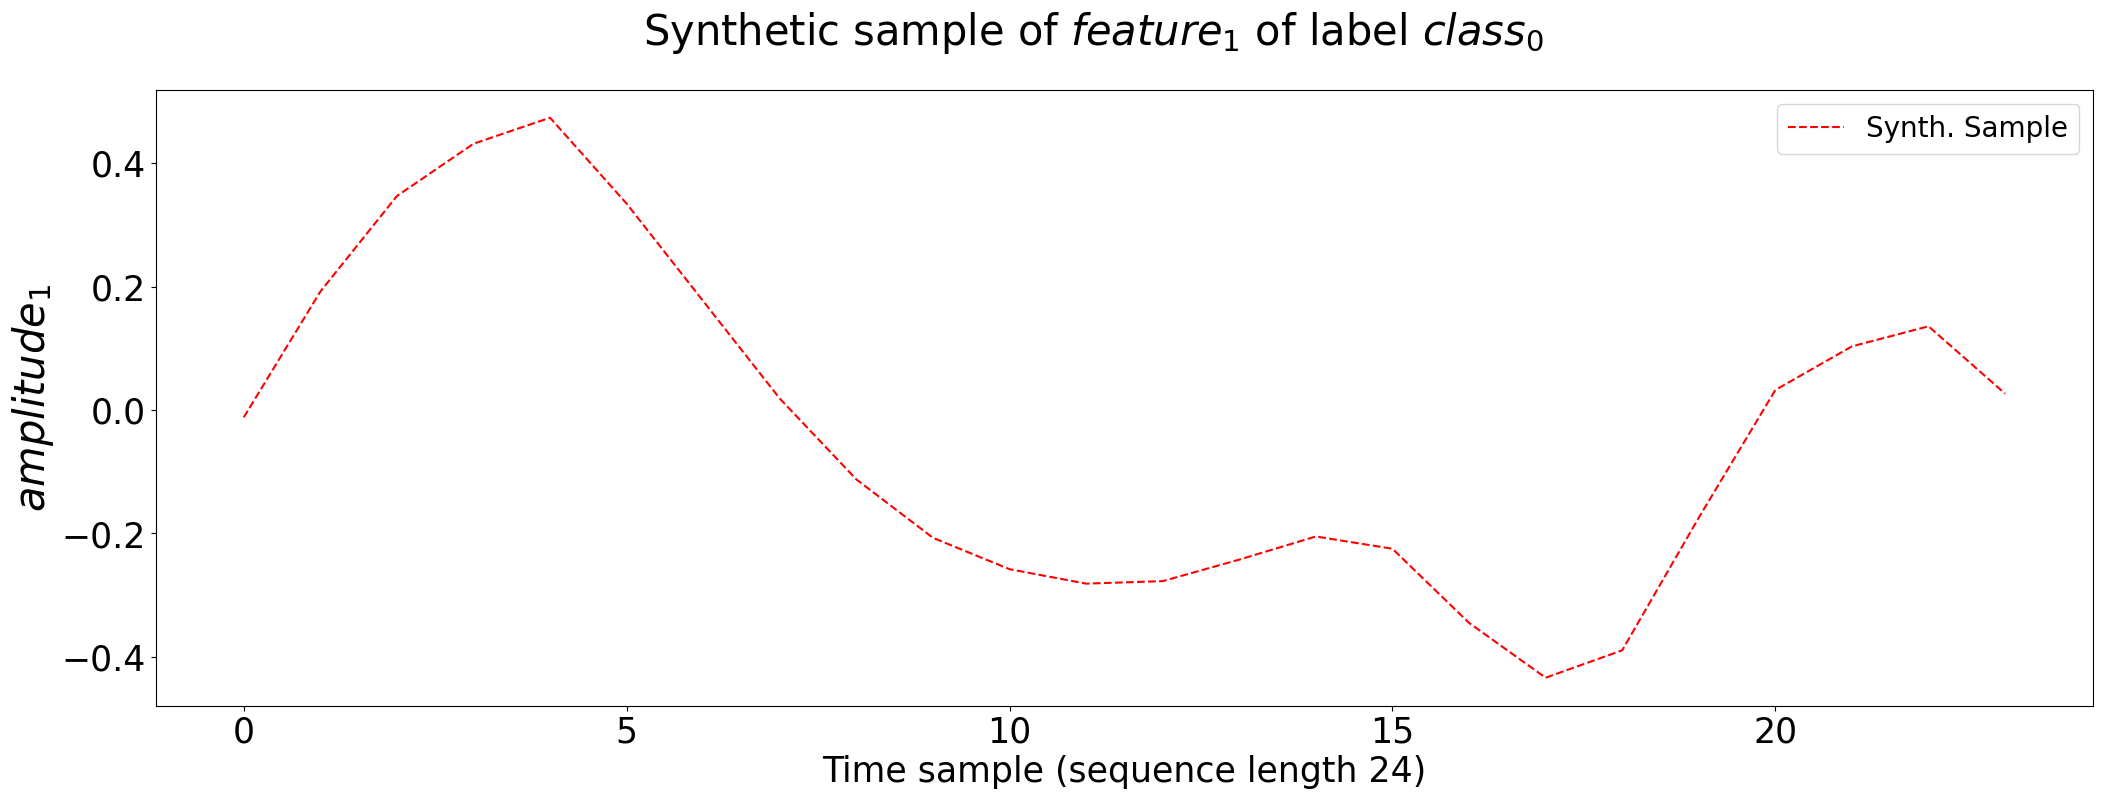

In [34]:
plot_synthetic(generated_data_TimeGAN, 8)